<a href="https://colab.research.google.com/github/meera4/Azam-Nouri/blob/main/Walmart_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Overview

This project aims to analyze Walmart's sales data to reveal valuable insights. The key questions we address include:

1. Which store shows the greatest fluctuation in sales?

2. Which holidays recorded sales higher than the average non-holiday period across all stores,  despite the typical negative impact holidays have on sales?

3. Which stores experienced significant growth in 2012?

4. Which stores have the highest and lowest overall sales?
5. Provide a detailed analysis of sales trends on a monthly and semester basis, uncovering important insights.

6. Develop a predictive model to forecast future demand and sales patterns.

This analysis seeks to uncover patterns that can inform Walmart’s sales strategies and enhance future planning.

### Dataset Overview

The dataset contains sales information for 45 Walmart stores, sourced from Kaggle, spanning from February 5, 2010, to November 1, 2012.
[Kaggle](https://www.kaggle.com/aditya6196/retail-analysis-with-walmart-data)

The key features of the dataset include:

Date: The specific week associated with the sales data.\
Store: A unique identifier for each store.\
Weekly_Sales: Total sales figures for each store during the specified week.\
Temperature: The recorded temperature on the day of the sale.\
Fuel_Price: The average fuel price in the region during that week.\
CPI: Consumer Price Index, indicating the economic conditions at the time.\
Unemployment: The prevailing unemployment rate in the region.\
Holiday_Flag: A binary indicator showing whether the week was a holiday (1 for holiday week, 0 for non-holiday week).\

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset
data = pd.read_csv('Walmart_Store_sales.csv')

# Convert 'Date' column to datetime format with day-first interpretation
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Display dataset information
print("Dataset Information:")
data.info()

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Extract Day, Month, and Year from 'Date' column
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Display first few rows of the dataset with new columns
print("\nUpdated Dataset:")
data.head()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB

Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Updated Dataset:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


### Identify the store with the highest sales variability (maximum standard deviation)

Store #14 has the highest sales variability with a standard deviation of $317569.95.
Store #35 has the highest variability relative to its mean sales.


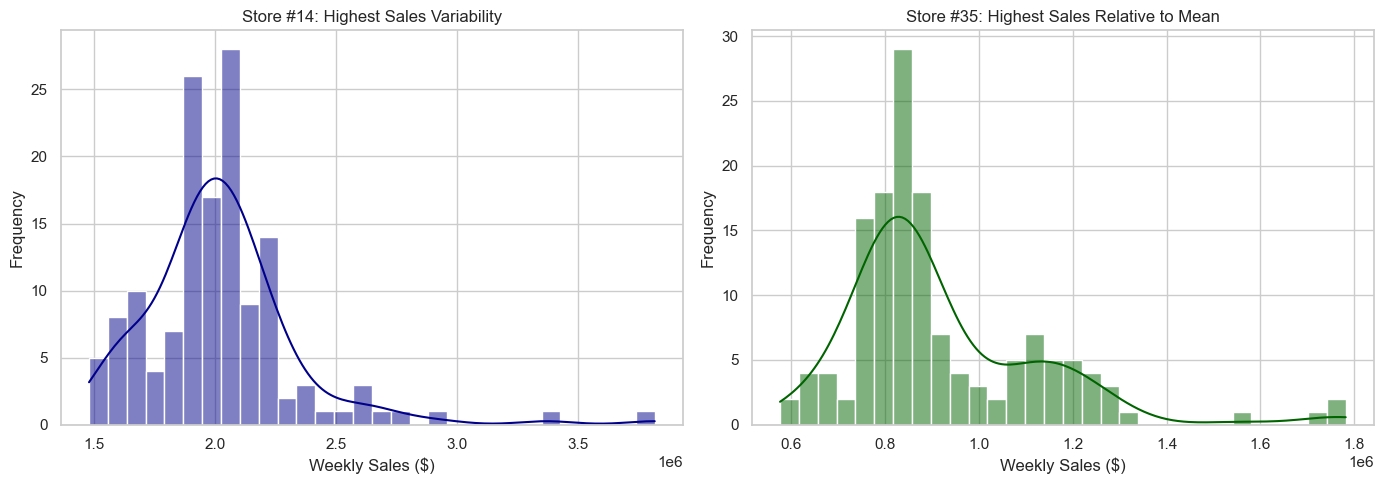

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Find the store with the highest sales variability (maximum standard deviation)
std_sales = data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
max_std_store = std_sales.idxmax()

# Display the store with the highest sales variability
print(f"Store #{max_std_store} has the highest sales variability with a standard deviation of ${std_sales[max_std_store]:.2f}.")

# Find the store with the highest variability relative to the mean (coefficient of variation)
coef_var = std_sales / data.groupby('Store')['Weekly_Sales'].mean()
max_coef_var_store = coef_var.idxmax()

# Display the store with the highest coefficient of variation
print(f"Store #{max_coef_var_store} has the highest variability relative to its mean sales.")

# Plot the sales distributions for the two stores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot sales distribution for the store with the highest standard deviation
sns.histplot(data[data['Store'] == max_std_store]['Weekly_Sales'], bins=30, kde=True, color='darkblue', ax=axes[0])
axes[0].set_title(f'Store #{max_std_store}: Highest Sales Variability')
axes[0].set_xlabel('Weekly Sales ($)')
axes[0].set_ylabel('Frequency')

# Plot sales distribution for the store with the highest coefficient of variation
sns.histplot(data[data['Store'] == max_coef_var_store]['Weekly_Sales'], bins=30, kde=True, color='darkgreen', ax=axes[1])
axes[1].set_title(f'Store #{max_coef_var_store}: Highest Sales Relative to Mean')
axes[1].set_xlabel('Weekly Sales ($)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### "Identify Store Sales Growth: September vs. October 2012."

The store with the highest sales growth from September to October 2012 is Store 18 with an increase of $324,266.60.


<Figure size 1500x700 with 0 Axes>

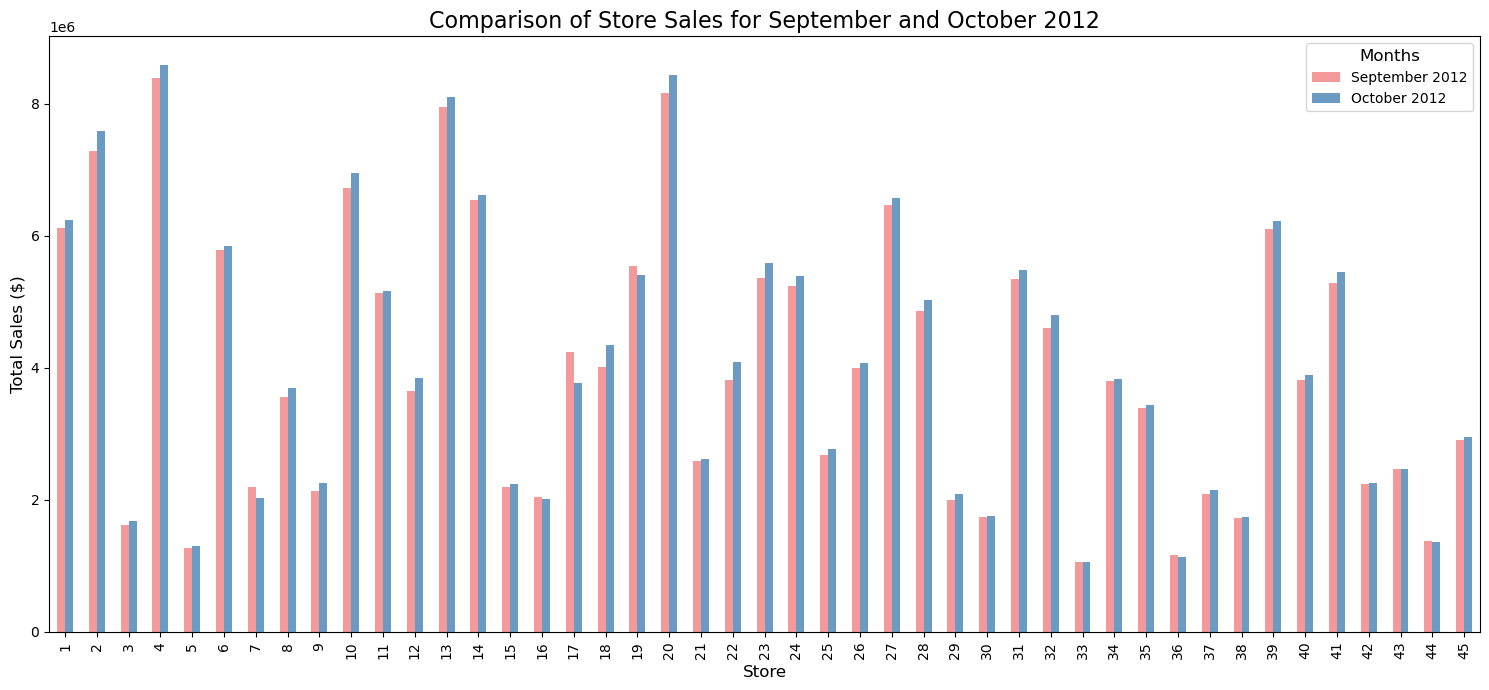

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Define the figure size
plt.figure(figsize=(15, 7))

# Sales for October 2012
october_sales_2012 = data[(data['Date'] >= '2012-10-01') & (data['Date'] <= '2012-10-31')].groupby('Store')['Weekly_Sales'].sum()

# Sales for September 2012
september_sales_2012 = data[(data['Date'] >= '2012-09-01') & (data['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Combine both months into a DataFrame for easier comparison
sales_comparison = pd.DataFrame({'September 2012': september_sales_2012, 'October 2012': october_sales_2012})

# Plotting the comparison between September and October sales
ax = sales_comparison.plot(kind='bar', figsize=(15, 7), color=['lightcoral', 'steelblue'], alpha=0.8)

# Customizing the plot
ax.set_title("Comparison of Store Sales for September and October 2012", fontsize=16)
ax.set_xlabel("Store", fontsize=12)
ax.set_ylabel("Total Sales ($)", fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(["September 2012", "October 2012"], title="Months", fontsize=10, title_fontsize=12)

# Store with the best growth from September to October 2012
best_growth_store = (october_sales_2012 - september_sales_2012).idxmax()
best_growth_value = (october_sales_2012 - september_sales_2012).max()

print(f"The store with the highest sales growth from September to October 2012 is Store {best_growth_store} with an increase of ${best_growth_value:,.2f}.")

# Show the plot
plt.tight_layout()
plt.show()


### "Identifying the stores with the minimum and maximum sales."

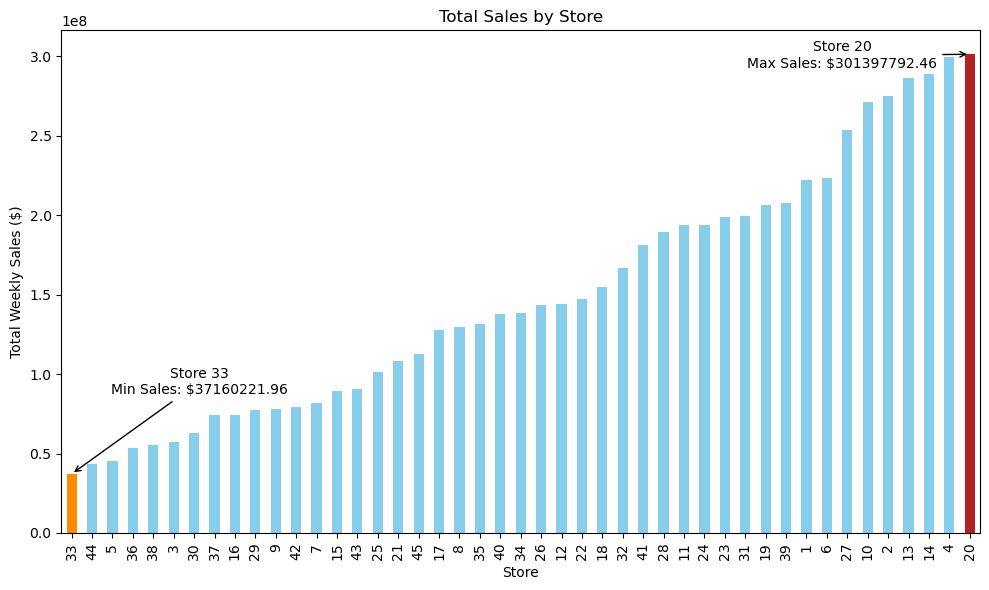

In [ ]:
# Sum Weekly_Sales for each store and sort by total sales
total_sales_for_each_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values()

# Define colors for the bar chart: orange for minimum, red for maximum, skyblue for the rest
colors = ['darkorange' if x == total_sales_for_each_store.min()
          else 'firebrick' if x == total_sales_for_each_store.max()
          else 'skyblue' for x in total_sales_for_each_store]

# Plot the bar chart
ax = total_sales_for_each_store.plot(kind='bar', color=colors, figsize=(10, 6))

# Add annotations for min and max sales
min_store, max_store = total_sales_for_each_store.idxmin(), total_sales_for_each_store.idxmax()
min_value, max_value = total_sales_for_each_store.min(), total_sales_for_each_store.max()

ax.annotate(f"Store {min_store}\nMin Sales: ${min_value:.2f}",
            xy=(0, min_value), xycoords='data', xytext=(0.15, 0.3),
            textcoords='axes fraction', arrowprops=dict(arrowstyle="->"),
            ha='center', va='center')

ax.annotate(f"Store {max_store}\nMax Sales: ${max_value:.2f}",
            xy=(len(total_sales_for_each_store) - 1, max_value),
            xycoords='data', xytext=(0.85, 0.95), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"), ha='center', va='center')

# Customize plot
ax.set_title('Total Sales by Store')
ax.set_xlabel('Store')
ax.set_ylabel('Total Weekly Sales ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### "Identify sales trends by presenting both a monthly and semester view of sales in units, and offer key insights based on the analysis."

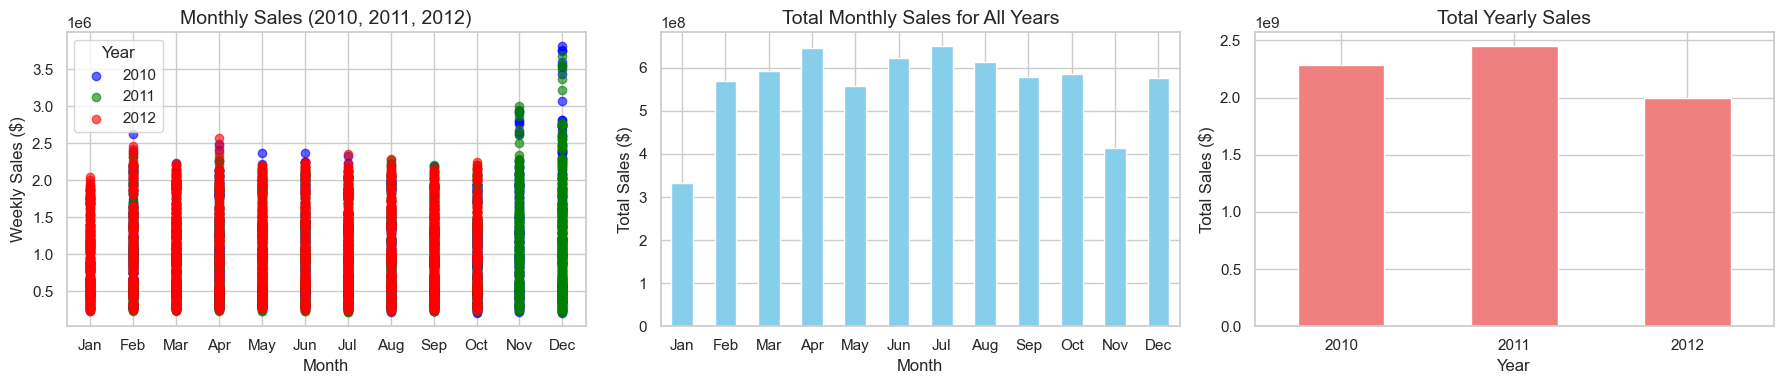

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visuals
sns.set(style="whitegrid")

# Create a 1x3 grid for displaying all plots in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Scatter plot for monthly sales by year
colors = {'2010': 'blue', '2011': 'green', '2012': 'red'}
for year, color in colors.items():
    axes[0].scatter(data[data.Year == int(year)]["Month"],
                    data[data.Year == int(year)]["Weekly_Sales"],
                    label=year, color=color, alpha=0.6)

axes[0].set_title("Monthly Sales (2010, 2011, 2012)", fontsize=14)
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Weekly Sales ($)")
axes[0].legend(title="Year")
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Bar plot for total monthly sales
data.groupby('Month')['Weekly_Sales'].sum().plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title("Total Monthly Sales for All Years", fontsize=14)
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Total Sales ($)")
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

# Bar plot for total yearly sales
data.groupby('Year')['Weekly_Sales'].sum().plot(kind='bar', color='lightcoral', ax=axes[2])
axes[2].set_title("Total Yearly Sales", fontsize=14)
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Total Sales ($)")
axes[2].set_xticks(axes[2].get_xticks())
axes[2].set_xticklabels(data['Year'].unique(), rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()


### "Identify holidays where sales were higher than the average sales during non-holiday periods across all stores, even though some holidays usually reduce sales."


**Key Sales Dates:**

Thanksgiving: November 26, 2010; November 25, 2011; November 23, 2012; November 29, 2013\
Christmas: December 31, 2010; December 30, 2011; December 28, 2012; December 27, 2013\
Super Bowl: February 12, 2010; February 11, 2011; February 10, 2012; February 8, 2013\
Labor Day: September 10, 2010; September 9, 2011; September 7, 2012; September 6, 2013


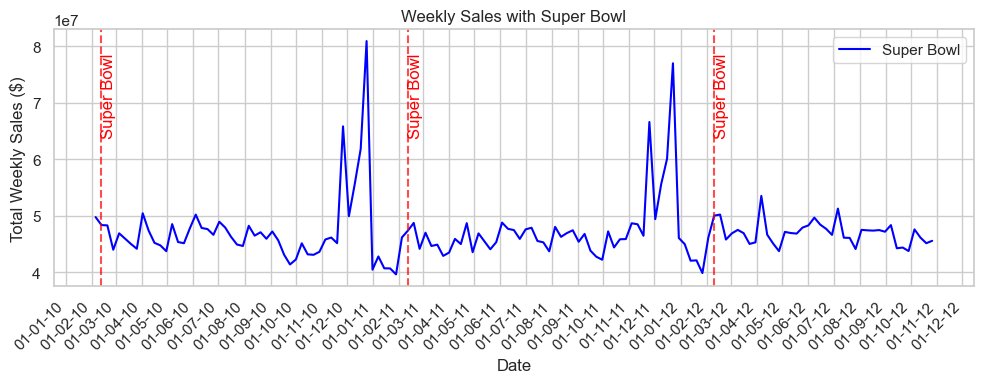

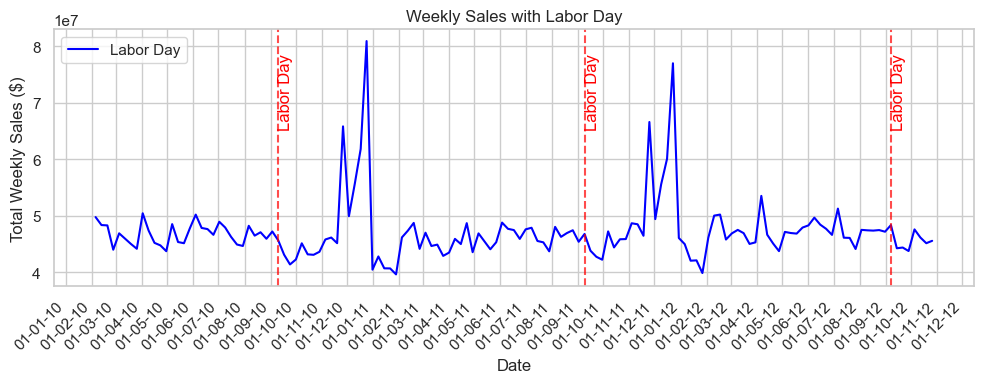

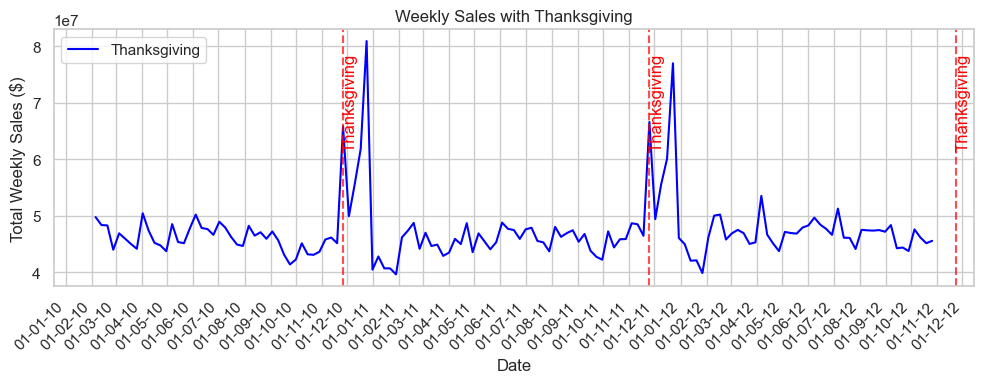

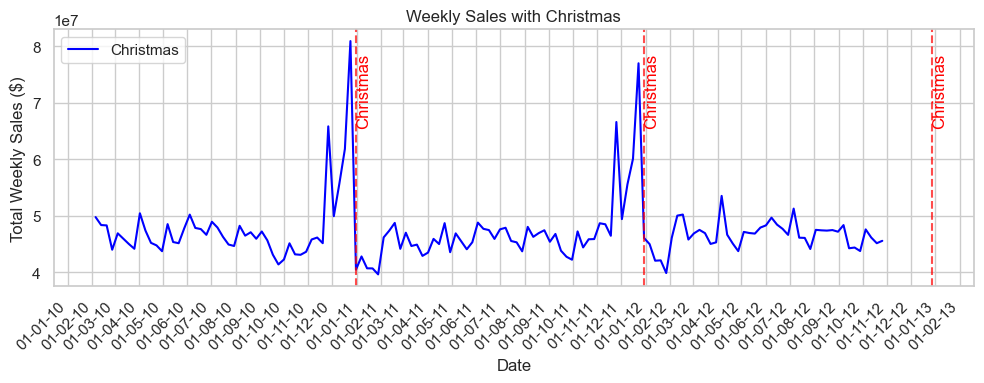

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import dates

# Improved plot_line function
def plot_line(df, holiday_dates, holiday_label, color='red', linestyle='--'):
    fig, ax = plt.subplots(figsize=(10, 4))  # Made the figure size smaller for compactness
    ax.plot(df['Date'], df['Weekly_Sales'], label=holiday_label, color='blue')

    # Plot vertical lines and annotations for holiday dates
    for day in [datetime.strptime(day, '%d-%m-%Y') for day in holiday_dates]:
        ax.axvline(x=day, linestyle=linestyle, color=color, alpha=0.7)
        ax.text(day, ax.get_ylim()[1] * 0.95, holiday_label, rotation=90, verticalalignment='top', color=color)

    # Customize plot
    ax.set(title=f'Weekly Sales with {holiday_label}', xlabel='Date', ylabel='Total Weekly Sales ($)')
    ax.xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%y'))
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))
    plt.gcf().autofmt_xdate(rotation=45)
    ax.legend()
    plt.tight_layout()
    plt.show()

# Prepare total sales data for plotting
total_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Holiday dates in a dictionary for efficient iteration
holidays = {
    'Super Bowl': ['12-02-2010', '11-02-2011', '10-02-2012'],
    'Labor Day': ['10-09-2010', '09-09-2011', '07-09-2012'],
    'Thanksgiving': ['26-11-2010', '25-11-2011', '23-11-2012'],
    'Christmas': ['31-12-2010', '30-12-2011', '28-12-2012']
}

# Plot each holiday using a loop
for holiday_name, holiday_dates in holidays.items():
    plot_line(total_sales, holiday_dates, holiday_name)


#### Sales saw an increase during Thanksgiving, while they experienced a decline during Christmas.

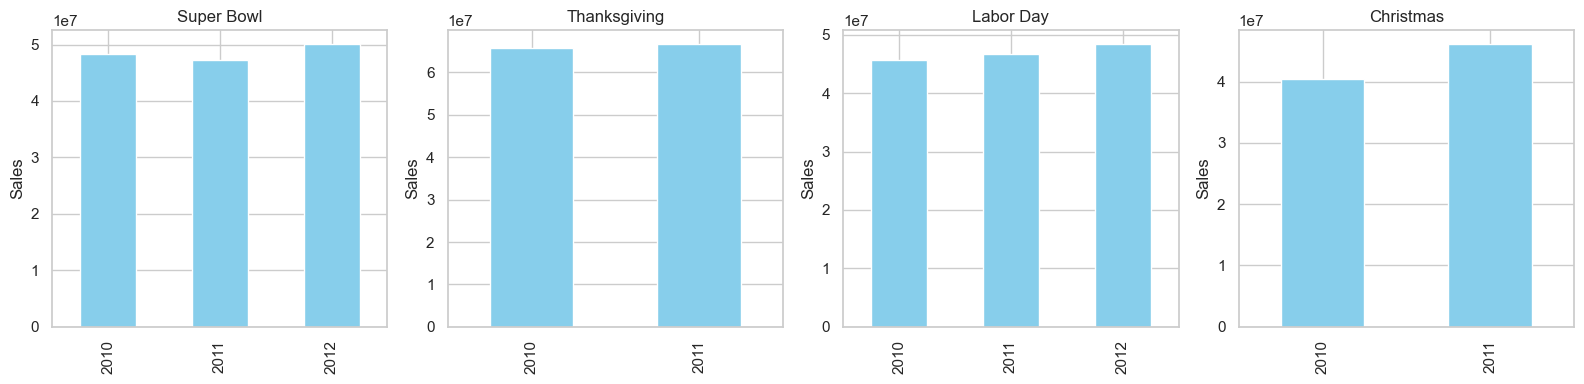

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Holiday dates and their respective names
holidays = {
    'Super Bowl': ['12-02-2010', '11-02-2011', '10-02-2012'],
    'Thanksgiving': ['26-11-2010', '25-11-2011', '23-11-2012'],
    'Labor Day': ['10-09-2010', '09-09-2011', '07-09-2012'],
    'Christmas': ['31-12-2010', '30-12-2011', '28-12-2012']
}

# Convert holiday dates to datetime format
holidays = {k: pd.to_datetime(v, format='%d-%m-%Y') for k, v in holidays.items()}

# Plot the sales for each holiday in a single row
fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # Adjusted to 1 row, 4 columns
axes = axes.flatten()

for i, (holiday_name, holiday_dates) in enumerate(holidays.items()):
    holiday_df = data.loc[data['Date'].isin(holiday_dates)].groupby('Year')['Weekly_Sales'].sum()
    if not holiday_df.empty:
        holiday_df.plot(kind='bar', ax=axes[i], color='skyblue', title=holiday_name)
    else:
        axes[i].set_title(f'{holiday_name} (No Data)')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Sales')

plt.tight_layout()
plt.show()


## Cleaning the Data

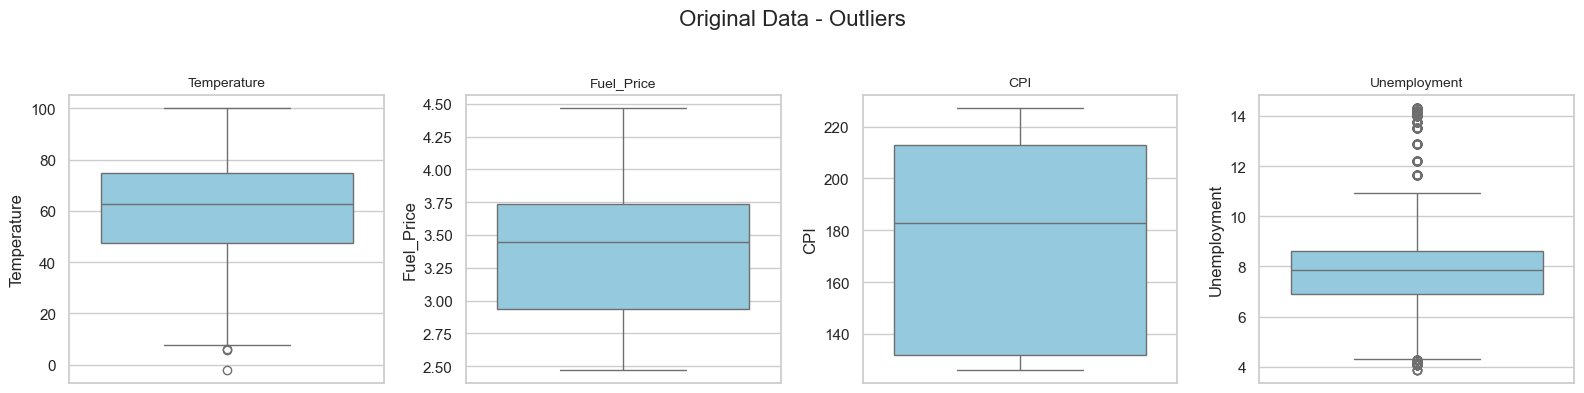

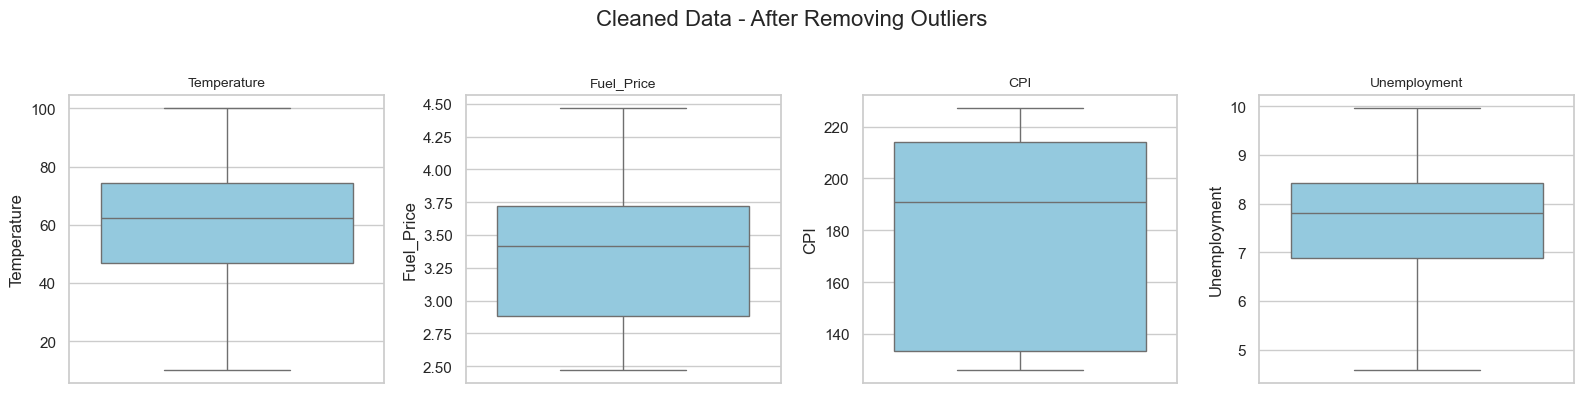

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot boxplots for given features, arranged in a 1x4 grid
def plot_boxplots(df, features, title):
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))  # Create a 1x4 grid of small plots
    fig.suptitle(title, fontsize=16)
    axs = axs.flatten()  # Flatten the axes for easy iteration
    for i, column in enumerate(features):
        sns.boxplot(df[column], ax=axs[i], color='skyblue')
        axs[i].set_title(f'{column}', fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to avoid overlap with title
    plt.show()

# Initial feature set for outlier detection
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Plot original data to find outliers
plot_boxplots(data, features, title='Original Data - Outliers')

# Drop outliers based on specific conditions
data_cleaned = data[(data['Unemployment'] < 10) & (data['Unemployment'] > 4.5) & (data['Temperature'] > 10)]

# Plot cleaned data to check for outliers
plot_boxplots(data_cleaned, features, title='Cleaned Data - After Removing Outliers')


## Model: Forecasting future demand

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set the style for better visuals
sns.set(style="whitegrid")

# Prepare the data (assuming 'data' is already defined)
X = data[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year']]  # Features
y = data['Weekly_Sales']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest Regressor using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Model evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")




Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
R-squared: 0.9608
Mean Absolute Error (MAE): 56901.72
Root Mean Squared Error (RMSE): 112425.48


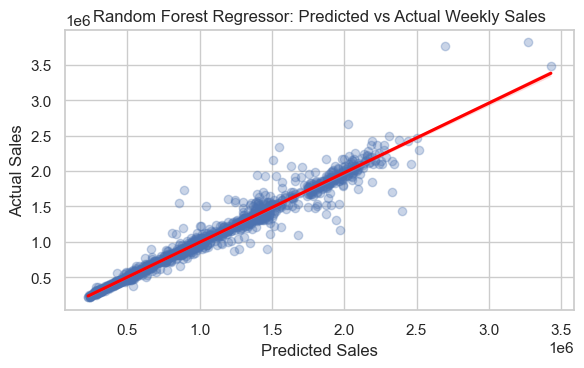

In [ ]:
# Visualize the predicted vs actual values using a regression plot
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=y_test, line_kws={"color": "red"}, scatter_kws={"alpha": 0.3})
plt.xlabel('Predicted Sales')
plt.ylabel('Actual Sales')
plt.title('Random Forest Regressor: Predicted vs Actual Weekly Sales')
plt.tight_layout()
plt.show()